In [4]:
from pymaxed.maxed import Maxed
from pymaxed.vectors import Vec
from pymaxed.pdfs import bi_normal_ref_1
from pyapes.core.mesh import Mesh
from pyapes.core.geometry import Box, Cylinder

# The Maximum Entropy Distribution problem

Given is a set of moments $\vec{m}$ the entropy constraints of the Maximum Entropy distribution in the phase space $\vec{u}$.

For the given problem, we'd like to reconstruct the distribution

$$
f^{MED}_{\vec{\lambda}} := exp(\vec{\lambda}\cdot\Phi(\vec{u}))
$$.

This can be achieved by solving the unconstrained minimization problem:

$$
\vec{\lambda}(\vec{m}) = \text{argmin} \left\{\int \exp{(\vec{\tilde{\lambda}} \cdot \Phi(\vec{u}))} d\vec{u} - \vec{\tilde{\lambda}}\cdot \vec{m}\right\}.
$$

## Numerical implementation
### 1D PDF reconstruction

Assume we have the set of moment $\vec{m} = [1, 0, 1, -0.27, 1.7178]^T$ in the 1D phase space. This set of moment implies reconstruction of the MaxEd using the moment up to an order of 4.

Using `pymaxed` package, above mathematical problem reads


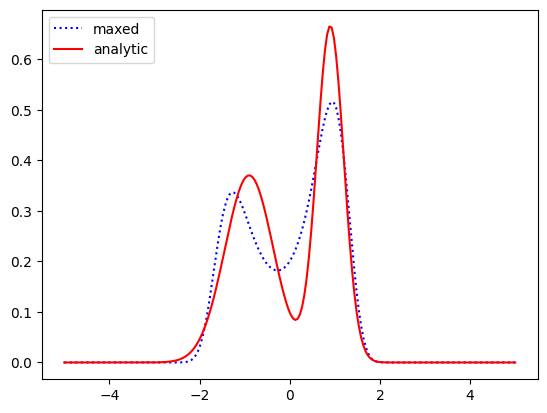

In [11]:
target = [1, 0, 1, -0.27, 1.7178] # target moments set. Can be either list of float or Tensor
mesh = Mesh(Box[-5:5], None, [200]) # Phase space. For the cartensian mesh, use the Box geometry. For the cylindrical mesh, use the Cylinder geometry
vec = Vec(mesh, target, 4, [200]) # Construct the vector spaces for the polynomial basis

maxed = Maxed(vec) # Construct the MaxEd object

maxed.solve() # Solve for the gamma
import matplotlib.pyplot as plt
analytic = bi_normal_ref_1(mnts_order=4, m=0.9, s=0.3, bound=5, n_vel=200)


_, ax = plt.subplots(1, 1)
plt.plot(vec.dv[0], maxed.dist, "b:", label="maxed")
plt.plot(vec.dv[0], analytic["pdf"], "r-", label="analytic")
plt.legend(loc="upper left")

### 2D axisymmetric PDF reconstruction

The axisymmetric implementation can be achieved by using `pyapes.core.gemetry.Cylinder` class in `pymaxed.vector.Vec` class.

Below example is utilizing the target set of moments which is the same as above in the vertical direction while the radial direction maintains the Gaussian distribution.

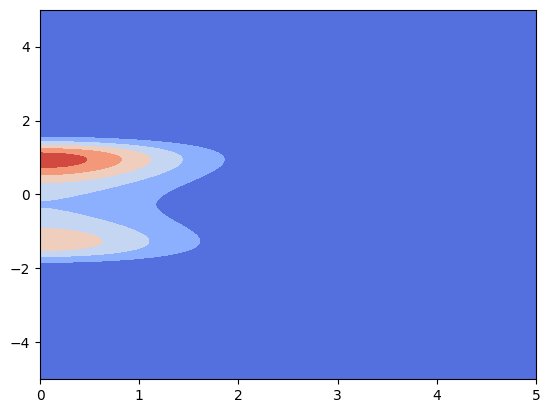

In [9]:
target = [1, 0, 1, -0.27, 1.7178, 2, 8, 0, 2]
mesh = Mesh(Cylinder[0:5, -5:5], None, [128, 256])

vec = Vec(mesh, target, 4, [50, 100])
maxed = Maxed(vec)

maxed.solve()
_, ax = plt.subplots(1, 1)
plt.contourf(vec.dv[0], vec.dv[1], maxed.dist, cmap="coolwarm")
